In [1]:
#import sys
#sys.path.insert(0, r'C:\Users\Kevin\Documents\Studium\Master_Thesis\GemPy_Models\gempy')
import gempy as gp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
geo_model = gp.create_model('Uncertainty_Hausham_Syncline_Helv_Thrust')

In [3]:
gp.init_data(geo_model, [4483500,4491100.,5287000,5294000.,-1000,1200.],[100,100,100],
            path_o = 'C:/Users/Kevin/Documents/Studium/Master_Thesis/GemPy_Models/data/True_Boundary_Sets/Uncertainty_Hausham_Helv_Thrust/orientations_Uncertainty_Hausham_Helv_Thrust.csv',
            path_i = 'C:/Users/Kevin/Documents/Studium/Master_Thesis/GemPy_Models/data/True_Boundary_Sets/Uncertainty_Hausham_Helv_Thrust/Points_Uncertainty_Hausham_Helv_Thrust.csv', default_values=True);

Active grids: ['regular']


In [4]:
gp.get_data(geo_model, 'surface_points').head()

,X,Y,Z,X_r,Y_r,Z_r,surface,series,id,order_series,smooth
0,4491092.197,5290571.959,859.718922,0.749585,0.438913,0.541490,Baustein Beds,Default series,1,1,1.000000e-08
1,4485599.701,5289663.717,816.109631,0.387401,0.379022,0.538614,Baustein Beds,Default series,1,1,1.000000e-08
2,4487939.758,5289967.551,772.191961,0.541708,0.399057,0.535718,Baustein Beds,Default series,1,1,1.000000e-08
3,4485904.071,5292733.009,754.799017,0.407471,0.581416,0.534571,Baustein Beds,Default series,1,1,1.000000e-08
4,4490607.253,5293521.794,704.724742,0.717607,0.633430,0.531269,Baustein Beds,Default series,1,1,1.000000e-08


In [5]:
gp.get_data(geo_model, 'orientations').head()

,X,Y,Z,X_r,Y_r,Z_r,G_x,G_y,G_z,dip,azimuth,polarity,surface,series,id,order_series,smooth
4,4490813.781,5290501.691,905.000000,0.731226,0.434279,0.544476,-2.105686e-01,0.578533,-7.880108e-01,38,160,-1,Baustein Beds,Default series,1,1,0.01
23,4490413.746,5293411.739,714.205592,0.704847,0.626173,0.531894,2.935753e-01,-0.629574,7.193398e-01,44,155,1,Baustein Beds,Default series,1,1,0.01
24,4490909.815,5293564.701,715.000000,0.737559,0.636259,0.531947,1.000094e-12,-0.766044,6.427876e-01,50,180,1,Baustein Beds,Default series,1,1,0.01
1,4491023.000,5290290.000,930.500000,0.745022,0.420320,0.546157,1.116189e-01,-0.633022,7.660444e-01,40,170,1,Helvetics_Base_Thrust,Default series,2,1,0.01
0,4484335.990,5290280.297,810.000000,0.304069,0.419680,0.538211,1.000000e-12,1.000000,1.000061e-12,90,0,1,Lower Bunte Molasse,Default series,3,1,0.01


In [6]:
geo_model.surfaces

,surface,series,order_surfaces,isBasement,color,id
0,Baustein Beds,Default series,1,False,#015482,1
1,Helvetics_Base_Thrust,Default series,2,False,#9f0052,2
2,Lower Bunte Molasse,Default series,3,False,#ffbe00,3
3,Lower Chattian Coal FM,Default series,4,False,#728f02,4
4,basement,Basement,1,True,#443988,5


In [7]:
gp.map_series_to_surfaces(geo_model,
                            {"Helvetics_Thrust":('Helvetics_Base_Thrust'),
                             "Molasse": ('Lower Bunte Molasse','Lower Chattian Coal FM','Baustein Beds','basement')},remove_unused_series=True);

In [8]:
geo_model.set_is_fault(['Helvetics_Thrust'])

Fault colors changed. If you do not like this behavior, set change_color to False.


,isFault,isFinite
Helvetics_Thrust,True,False
Molasse,False,False


In [9]:
geo_model.faults.faults_relations_df

,Helvetics_Thrust,Molasse
Helvetics_Thrust,False,True
Molasse,False,False


In [10]:
geo_model.series

,order_series,BottomRelation
Helvetics_Thrust,1,Fault
Molasse,2,Erosion


In [11]:
new_colors={'Baustein Beds':'#e8e402', 'Lower Chattian Coal FM':'#9e5f00','Lower Bunte Molasse':'#ff7700','basement':'#000000','Helvetics_Base_Thrust':'#24deff'}
geo_model.surfaces.colors.change_colors(new_colors)

,surface,series,order_surfaces,isBasement,color,id
1,Helvetics_Base_Thrust,Helvetics_Thrust,1,False,#24deff,1
0,Baustein Beds,Molasse,1,False,#e8e402,2
2,Lower Bunte Molasse,Molasse,2,False,#ff7700,3
3,Lower Chattian Coal FM,Molasse,3,False,#9e5f00,4
4,basement,Molasse,4,True,#000000,5


In [12]:
geo_model.surfaces.colors.change_colors()

Click to select new colors.


In [13]:
geo_model.grid

Grid Object. Values: 
array([[ 4.483538e+06,  5.287035e+06, -9.890000e+02],
       [ 4.483538e+06,  5.287035e+06, -9.670000e+02],
       [ 4.483538e+06,  5.287035e+06, -9.450000e+02],
       ...,
       [ 4.491062e+06,  5.293965e+06,  1.145000e+03],
       [ 4.491062e+06,  5.293965e+06,  1.167000e+03],
       [ 4.491062e+06,  5.293965e+06,  1.189000e+03]])

In [23]:
%matplotlib inline
gp.plot.plot_data_3D(geo_model)

In [14]:
gp.set_interpolation_data(geo_model,
                         compile_theano=True,
                         theano_optimizer='fast_run',
                         verbose=[])

Compiling theano function...
Compilation Done!


In [15]:
gp.get_data(geo_model, 'kriging')

,values
range,10564.1
$C_o$,2.65714e+06
drift equations,"[3, 3]"
nugget grad,0.01
nugget scalar,1e-06


In [16]:
geo_model.additional_data.structure_data

,values
isLith,True
isFault,True
number faults,1
number surfaces,4
number series,2
number surfaces per series,"[1, 3]"
len surfaces surface_points,"[3, 7, 8, 5]"
len series surface_points,"[3, 20]"
len series orientations,"[1, 25]"


In [19]:
sol = gp.compute_model(geo_model, compute_mesh=False)

C:\Users\Kevin\Anaconda3\lib\site-packages\theano\tensor\slinalg.py:255: LinAlgWarning: Ill-conditioned matrix (rcond=9.05432e-30): result may not be accurate.
  rval = scipy.linalg.solve(A, b)


In [17]:
gp.compute_model(geo_model)

C:\Users\Kevin\Anaconda3\lib\site-packages\gempy\core\solution.py:253: UserWarning: Attribute error. Using non masked marching cubesmarching_cubes_lewiner() got an unexpected keyword argument 'mask'
  warnings.warn('Attribute error. Using non masked marching cubes' + str(e))



Lithology ids 
  [3.92547587 2.         2.         ... 3.58186093 3.57853909 3.57526746] 

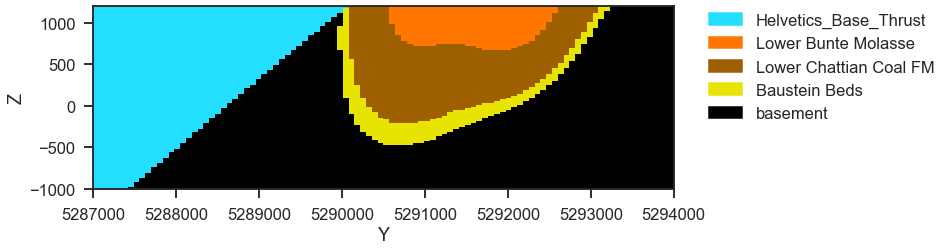

In [19]:
%matplotlib inline
gp.plot.plot_section(geo_model, cell_number=60, show_legend=True,
                    direction='x', show_data=False)

In [18]:
ver, sim = gp.get_surfaces(geo_model)

In [19]:
gp.plot.plot_3D(geo_model)

In [ ]:
gp.save_model(geo_model, path='C:/Users/Kevin/Documents/Studium/Master_Thesis/GemPy_Models')

# special location:

In [ ]:
x_i = np.array([[60,40,100]])
sol = gp.compute_model_at(x_i, geo_model)

In [ ]:
sol[0][0, :x_i.shape[0]]

In [ ]:
gp.plot.plot_3D(geo_model)